c:\Users\Pablo Zamora\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


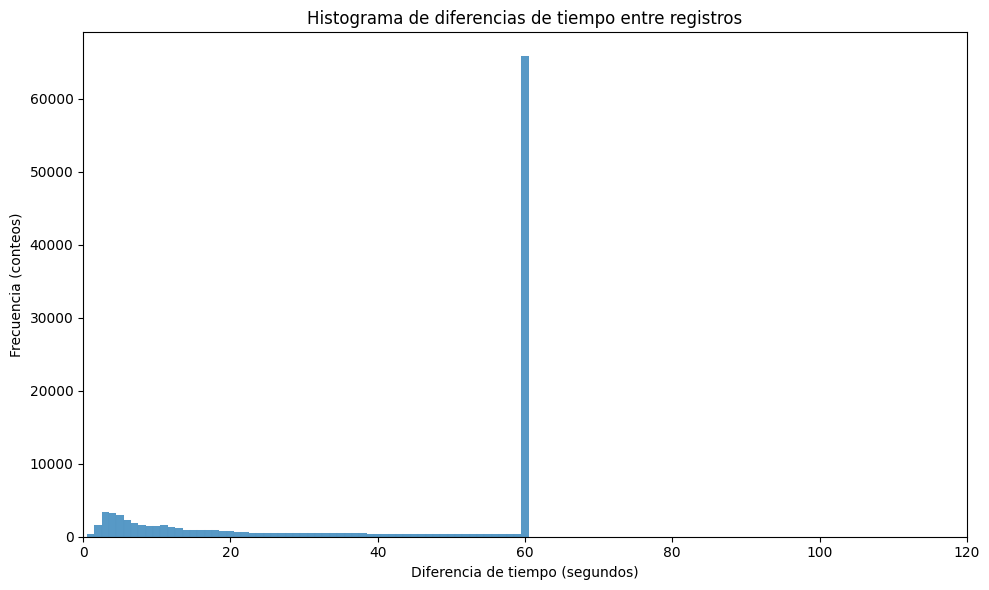

In [1]:
# Graficar histograma de diferencia de tiempos entre registros

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_time_diff_histogram(df: pd.DataFrame, max_sec=120):
    # Asegura orden correcto por grupo
    df = df.copy()
    df["Fecha"] = pd.to_datetime(df["Fecha"])
    df = df.sort_values(["Placa", "trip_id", "Fecha"])

    # Diferencia en segundos por grupo
    df["time_diff_s"] = df.groupby(["Placa", "trip_id"])["Fecha"].diff().dt.total_seconds()

    # Opcional: filtrar negativos o cero si son artefactos
    diffs = df["time_diff_s"].dropna()
    diffs = diffs[diffs > 0]

    # Bins de 1 segundo para ver “picos” nítidos (30s, 60s, etc.)
    bins = np.arange(0, max(diffs.max(), max_sec) + 1.5, 1)

    plt.figure(figsize=(10, 6))
    sns.histplot(diffs, bins=bins, kde=False, stat="count", discrete=True)
    plt.title("Histograma de diferencias de tiempo entre registros")
    plt.xlabel("Diferencia de tiempo (segundos)")
    plt.ylabel("Frecuencia (conteos)")
    plt.xlim(0, max_sec)  # zoom a 0–max_sec
    plt.tight_layout()
    plt.show()


df = pd.read_csv("D:\\2025\\UVG\\Tesis\\repos\\backend\\data_with_features\\u049\\u049_trips_with_next_station.csv")
plot_time_diff_histogram(df)